In [2]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
import mkipp
%matplotlib inline

# Hydrogen-shell burning

Last time, we studied how hydrogen is burnt into helium in low- and intermediate-mass stars ($1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$, respectively). In low-mass stars, hydrogen burning is via the pp-chain. The burning region gradually moves outwards from the core until the inert helium core is surrounded by a hydrogen-burning shell. More massive stars that burn hydrogen via the CNO cycle develop a convective core such that there is no gradual outward burning but at some point core hydrogen burning ceases when the star runs out of nuclear fuel in the core. The inner regions of the star contract until hydrogen is ignited in a shell surrounding the helium core. In this lab, we will study the further evolution of the two stars until they ignite helium in their cores. 

For the preparation of this lab, you could either have run the MESA models up to core helium ignition yourself or downloaded the MESA output of these models ([$1\,\mathrm{M}_\odot$ model here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/1M_to-core-he-ignition.tar.gz) and [$5\,\mathrm{M}_\odot$ model here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/5M_to-core-he-ignition.tar.gz); to extract the files, use `tar xzvf <file.tar.gz>` within the corresponding model folder; when you want to run the models, make sure that you have enabled/loaded the correct inlist in your central `inlist` file). 

We start by plotting a HR diagram and the central density-temperature plane to visualise the evolution (code taken from earlier lab and added lines of constant radii, $L=4\pi R^2 \sigma T_\mathrm{eff}^4$ and the region dominated by electron degeneracy pressure that you also plotted for your student report).

Text(0,0.5,'$\\log\\,T_\\mathrm{c}/\\mathrm{K}$')

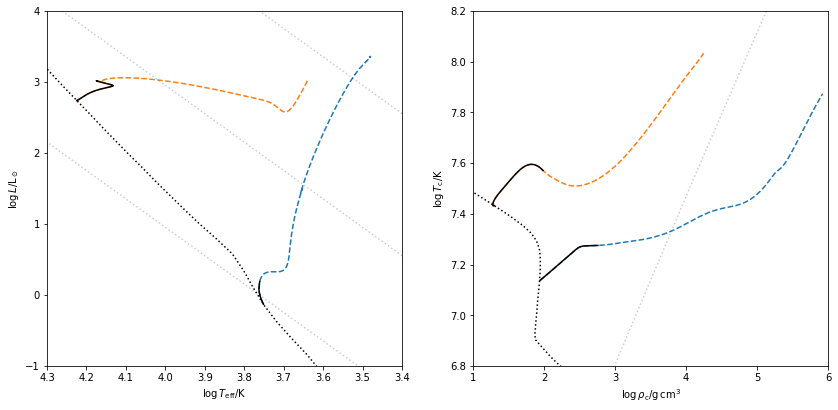

In [3]:
# make two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# ZAMS from previous lab
logL_zams, Teff_zams, Rho_c_zams, T7_c_zams = np.loadtxt('../06.zero-age_main-sequence/zams-properties.txt', usecols=(1,4,5,6), unpack=True)
logTeff_zams = np.log10(Teff_zams)
log_Rho_c_zams = np.log10(Rho_c_zams)
log_T_c_zams = np.log10(T7_c_zams) + 7.0

#
# HRD
#
ax1.plot(logTeff_zams, logL_zams, 'k:')

# plot 1 Msun track
log_1M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition')
log_L_1M = log_1M.history.log_L
log_Teff_1M = log_1M.history.log_Teff
ax1.plot(log_Teff_1M, log_L_1M, '--')
core_H_burn_mask_1M = log_1M.history.center_h1 > 1e-4
ax1.plot(log_Teff_1M[core_H_burn_mask_1M], log_L_1M[core_H_burn_mask_1M], 'k-')

# plot 5 Msun track
log_5M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition')
log_L_5M = log_5M.history.log_L
log_Teff_5M = log_5M.history.log_Teff
ax1.plot(log_Teff_5M, log_L_5M, '--')
core_H_burn_mask_5M = log_5M.history.center_h1 > 1e-4
ax1.plot(log_Teff_5M[core_H_burn_mask_5M], log_L_5M[core_H_burn_mask_5M], 'k-')

logT = np.linspace(3.4, 4.3, 2)
ax1.plot(logT, 2.0*0+4.0*(logT-np.log10(5777)), 'k:', alpha=0.2) # 1 Rsun
ax1.plot(logT, 2.0*1+4.0*(logT-np.log10(5777)), 'k:', alpha=0.2) # 10 Rsun
ax1.plot(logT, 2.0*2+4.0*(logT-np.log10(5777)), 'k:', alpha=0.2) # 100 Rsun

# zoom into interesting part of HR and use equal aspect ratio
ax1.set_xlim(4.3, 3.4)
ax1.set_ylim(-1, 4.0)
ax1.set_aspect(abs(4.3-3.4)/abs(-1-4.0))

ax1.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
ax1.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$')

#
# central density-temperature plane
#
# plot ZAMS from last lab
ax2.plot(log_Rho_c_zams, log_T_c_zams, 'k:')

# electron degeneracy
logRho_deg, logT_deg = np.loadtxt('psi4.data', unpack=True)
ax2.plot(logRho_deg, logT_deg, 'k:', alpha=0.2)

# plot 1 Msun track
log_Rho_c_1M = log_1M.history.log_center_Rho
log_T_c_1M = log_1M.history.log_center_T
ax2.plot(log_Rho_c_1M, log_T_c_1M, '--')
ax2.plot(log_Rho_c_1M[core_H_burn_mask_1M], log_T_c_1M[core_H_burn_mask_1M], 'k-')

# plot 5 Msun track
log_Rho_c_5M = log_5M.history.log_center_Rho
log_T_c_5M = log_5M.history.log_center_T
ax2.plot(log_Rho_c_5M, log_T_c_5M, '--')
ax2.plot(log_Rho_c_5M[core_H_burn_mask_5M], log_T_c_5M[core_H_burn_mask_5M], 'k-')

ax2.set_xlim(1.0, 6.0)
ax2.set_ylim(6.8, 8.2)
ax2.set_aspect(abs(6.0-1.0)/abs(8.2-6.8))

ax2.set_xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
ax2.set_ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')

#### Problem 1:
1. Describe the evolution of the two stars in the HR diagram. Where is the red giant branch and what determines its position?
2. Describe the evolution of the central density and central temperature. Do the cores become electron degenerate? Under which core conditions is helium ignited in the two models?

## Schönberg-Chandrasekhar limit
[Derivation on board.] The Schönberg-Chandrasekhar limit says that an isothermal core can only withstand the pressure from an envelope and remain in thermal equilibrium if 
\begin{align}
\frac{M_\mathrm{c}}{M} \leq 0.37 \left(\frac{\mu_\mathrm{env}}{\mu_\mathrm{c}}\right)^2\approx 0.13.
\end{align}
For our stars, the helium core masses at the end of the MS are:

In [4]:
print('1 Msun: %.2f Msun' % (log_1M.history.he_core_mass[core_H_burn_mask_1M][-1]))
print('5 Msun: %.2f Msun' % (log_5M.history.he_core_mass[core_H_burn_mask_5M][-1]))

1 Msun: 0.01 Msun
5 Msun: 0.40 Msun


So the core of the $1\,\mathrm{M}_\odot$ will surely remain in thermal equilibrium after the MS and that of the $5\,\mathrm{M}_\odot$ will (at least) initially also remain in thermal equilibrium. For later comparisons, the thermal timescale of the $1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$ models at the end of the MS are

In [5]:
print('%.1f Myr and' % (log_1M.history.kh_timescale[core_H_burn_mask_1M][-1]/1e6))
print('%.2f Myr.' % (log_5M.history.kh_timescale[core_H_burn_mask_5M][-1]/1e6))

12.0 Myr and
0.12 Myr.


The evolution of the effective temperature and helium core mass during shell hydrogen burning of the $5\,\mathrm{M}_\odot$ model are

Text(0,0.5,'$M_\\mathrm{c}\\,/\\,\\mathrm{M}_\\odot$')

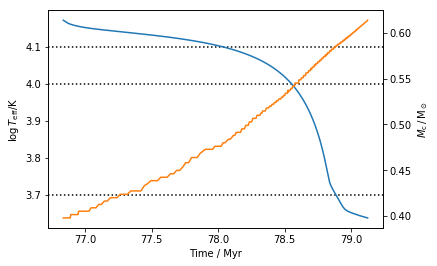

In [6]:
shell_H_burn_mask_5M = np.logical_not(core_H_burn_mask_5M)

plt.axhline(4.1, color='k', ls=':')
plt.axhline(4.0, color='k', ls=':')
plt.axhline(3.7, color='k', ls=':')

plt.plot(log_5M.history.star_age[shell_H_burn_mask_5M]/1e6, log_5M.history.log_Teff[shell_H_burn_mask_5M])

plt.xlabel('Time / Myr')
plt.ylabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')

ax2 = plt.twinx()
next(ax2._get_lines.prop_cycler) # manually advance color cycler...
plt.plot(log_5M.history.star_age[shell_H_burn_mask_5M]/1e6, log_5M.history.he_core_mass[shell_H_burn_mask_5M])

plt.ylabel(r'$M_\mathrm{c}\,/\,\mathrm{M}_\odot$')

So as soon as the core mass approaches $0.50\text{--}0.55\,\mathrm{M}_\odot$, that is the unstable regime according to the Schönberg-Chandrasekhar limit, the evolution speeds up and the star evolves through the HR diagram on a thermal timescale (of order $0.1\,\mathrm{Myr}$). This evolution is driven by the thermal-timescale contraction of the core.

Contrarily, the $1\,\mathrm{M}_\odot$ model does not "rush" through the HR diagram on a thermal timescale but slowly makes it way to the **red giant branch** (RGB) and finally climbs it until its evolution eventually also speeds up (but for different reasons; at this point, the core is dominated by electron degeneracy pressure and the Schönberg-Chandrasekhar limit does not apply anymore). Because the shell hydrogen burning phase is long-lived, many stars populate this region in the HR diagram and it is therefore well known as the *sub-giant branch* in HR diagrams of old star clusters.

Text(0,0.5,'$M_\\mathrm{c}\\,/\\,\\mathrm{M}_\\odot$')

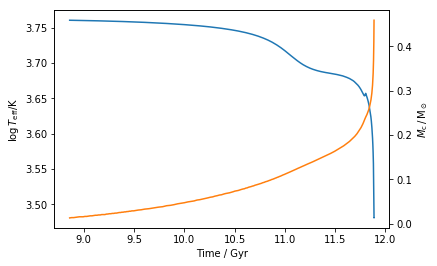

In [7]:
shell_H_burn_mask_1M = np.logical_not(core_H_burn_mask_1M)

plt.plot(log_1M.history.star_age[shell_H_burn_mask_1M]/1e9, log_1M.history.log_Teff[shell_H_burn_mask_1M])

plt.xlabel('Time / Gyr')
plt.ylabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')

ax2 = plt.twinx()
next(ax2._get_lines.prop_cycler) # manually advance color cycler...
plt.plot(log_1M.history.star_age[shell_H_burn_mask_1M]/1e9, log_1M.history.he_core_mass[shell_H_burn_mask_1M])

plt.ylabel(r'$M_\mathrm{c}\,/\,\mathrm{M}_\odot$')

Without convective core overshooting, stars of up to $8\,\mathrm{M}_\odot$ remain in thermal equilibrium after the end of the MS. With a moderate amount of convective core overshooting, the core masses at the end of the MS are larger and only stars of up to about $2\,\mathrm{M}_\odot$ remain in thermal equilibrium.

The immediate consequence of stars evolving quickly through the HR diagram is that there is a void, a dearth, of stars between the MS and the giant branch. This region is often called the **Hertzsprung gap** and prominently visible in HR diagrams of young(ish) stars.

## Mirror principle

During shell hydrogen burning, the cores of stars contract while the envelopes expand. This can be understood qualitatively by the so-called **mirror principle**. Let's recall how the interior structure of the $5\,\mathrm{M}_\odot$ evolves during core and shell hydrogen burning with the help of a Kippenhahn diagram.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(36.625,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

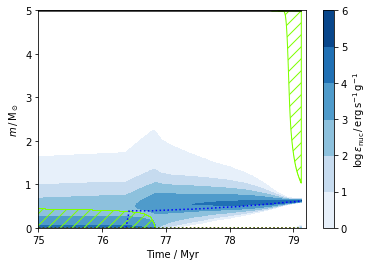

In [8]:
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition'], 
                                            xaxis = "star_age",
                                            decorate_plot = False), xlims = [75, 79.2])

# add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

# xy labels
plt.xlabel('Time / Myr')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

After core hydrogen burning, the configuration of the star is such that the inert helium core is surrounded by an actively burning shell and the envelope. While the core now contracts, the burning shell is dragged at deeper radii, heats up and increases the burning rate such that the envelope expands. 

If the core were to expand, the burning shell would be pushed to larger radii, it cools, burning becomes less vigorous and the envelope contracts. This is the essence of the mirror principle. One can even imagine to have two burning shells and one can indeed extend the mirror principle to such situations.

In the above Kippenhahn diagram, we can also see how a convective envelope develops and extends down to mass coordinates of $\approx 1\,\mathrm{M}_\odot$ where there was a convective core during the MS (the maximum extent of the convective core was up to $\approx 1.2\,\mathrm{M}_\odot$, see ZAMS or MS lab). This means that nuclear processed material from the former core of the star is now mixed throughout the envelope. This is called the **first dredge-up** and we will now look more closely at it. Further dredge-ups occur later in the evolution of stars after core helium exhaustion. 

## First dredge-up
To look more into the first dredge-up, we now also make a Kippenhahn diagram of the hydrogen shell burning phase of the $1\,\mathrm{M}_\odot$ model; however, we disable the colorbar showing energy generation because we did not store enough profiles over the course of the evolution of this model.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(27.125,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

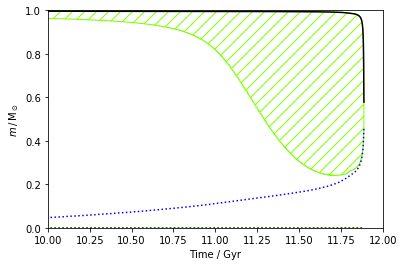

In [9]:
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition'], 
                                            xaxis = 'star_age',
                                            time_units = 'Gyr',
                                            levels = [100,200],
                                            decorate_plot = False), xlims = [10, 12])

# xy labels
plt.xlabel('Time / Gyr')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

From the hydrogen mass profiles studied in the MS lab, we know that some hydrogen has been burnt up to a mass coordinate of almost $0.5\,\mathrm{M}_\odot$. Hence, the convective envelope digs deep into this nuclear processed material for $\geq11.25\,\mathrm{Gyr}$. The convective envelope mixes on an eddy turnover time (i.e. roughly dynamical timescale) and nuclear processed material shows up on the surface.

#### Problem 2:
1. Plot the surface helium mass fraction as a function of time of the $1\,\mathrm{M}_\odot$ model. Why does the surface helium mass fraction increase gradually?
2. What is the helium mass fraction at an age of 11.75 Gyr at a mass coordinate of $0.4\,\mathrm{M}_\odot$? *Hint:* All plots you have made so far are enough to answer this!

In [10]:
# Your solution here


The blue dotted line in the Kippenhahn diagram indicates the helium core mass and as such traces the hydrogen-burning shell. In contrast to the $5\,\mathrm{M}_\odot$ model, this burning shell gradually moves up into regions where the convective envelope has previously extended down to. Because of the mixing in the convective envelope, the hydrogen burning shell suddenly finds itself in an environment with enhanced hydrogen fuel. As a consequence, the burning rate drops and the star becomes shortly less luminous.

#### Problem 3:
In the HR diagram, the short dip in luminosity causes a small bump in the evolutionary track on the giant branch. Zoom into this part of the HR diagram and illustrate this little bump. Also, indicate that point in the evolution where the first dredge-up has occurred. *Hint:* As before, use the function `np.argmin()` to find that index closest to the age when the first dredge-up happens. With this index, you can then plot the position of the dredge-up in HR diagram.

In [11]:
# Your solution here

Because there is suddenly more hydrogen fuel, the stars can live somewhat longer in this particular spot in the HR diagram. This might sound irrelevant but actually causes a visible feature in the HRD of old star clusters.

## Core-mass-luminosity relation for RGB stars
For low-mass stars on the RGB, there is a tight relation between the core mass of stars and the luminosity,
\begin{align}
L \approx 2.3 \times 10^5\,\mathrm{L}_\odot \left(\frac{M_\mathrm{c}}{\mathrm{M}_\odot}\right)^6 \quad \mathrm{for}\ M_\mathrm{c}\leq0.5\,\mathrm{M}_\odot.
\end{align}
Almost all stars with $M\lesssim2\,\mathrm{M}_\odot$ follow this relation on the RGB. While the luminosity of MS stars depends on the total mass of stars, for RGB stars the total mass is irrelevant.

#### Student-report part 1:
Plot the helium core mass vs the luminosity of the $1\,\mathrm{M}_\odot$ model on a log-log scale. Also add the above $M_\mathrm{c}$-$L$ relation. Is it a good representation of the MESA model?

(0.2, 3)

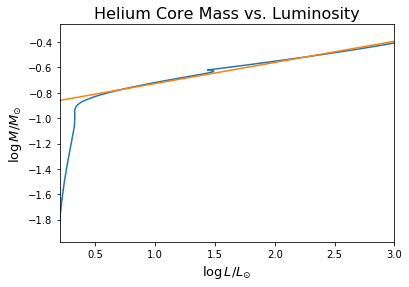

In [71]:
# Your solution here
L = 2.3e5*(np.log10(log_1M.history.he_core_mass[shell_H_burn_mask_1M]))**6
plt.plot(log_L_1M[shell_H_burn_mask_1M],np.log10(log_1M.history.he_core_mass[shell_H_burn_mask_1M]))
plt.plot(logL[shell_H_burn_mask_1M],np.log10(log_1M.history.he_core_mass[shell_H_burn_mask_1M]))
plt.xlabel(r'$\log \, L/L_{\odot}$',fontsize=13)
plt.ylabel(r'$\log \, M/M_{\odot}$',fontsize=13)
plt.title('Helium Core Mass vs. Luminosity',fontsize=16)
plt.xlim(0.2,3)

We now wish to understand this result better. For MS stars, the total mass sets the central temperature and hence the burning rate and luminosity. For RGB stars, the envelope is extended and 'fluffy' such that it exerts almost no pressure on the core regions where the hydrogen burning shell is located.

#### Student-report part 2:
Plot the logarithm of the pressure as a function of mass coordinate for a RGB model of the $1\,\mathrm{M}_\odot$ sequence. You will see a sharp drop of the pressure at the core-envelope interface where the hydrogen burning shell is located. Explain why this implies that the luminosity of RGB stars is only given by their core mass. *Hint:* model number 3000 should provide a good visualisation.

Text(0.5,1,'pressure vs. mass coordinate')

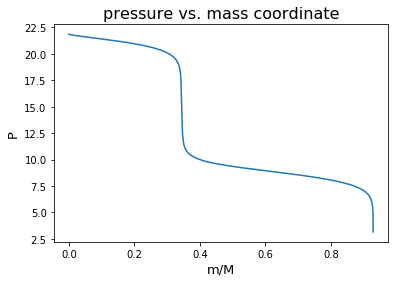

In [15]:
# Your solution here
plt.plot(log_1M.profile_data(3000).mass,log_1M.profile_data(3000).logP )
plt.xlabel('m/M',fontsize=13)
plt.ylabel('P',fontsize=13)
plt.title('pressure vs. mass coordinate',fontsize=16)